In [1]:
!pip install osmnx &> /dev/null
!pip install matplotlib==3.1.3 &> /dev/null

In [2]:
import os, sys
import osmnx as ox
import networkx as nx
import numpy as np
import pandas as pd
import geopandas as gpd

from PIL import Image
from io import BytesIO

import requests
from tqdm import tqdm
import time
import matplotlib.pyplot as plt

import cv2 

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import logging
logger = logging.getLogger()
# logger.setLevel(logging.DEBUG)

/usr/local/lib/python3.8/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 1.Road Networks Data

In [3]:
%matplotlib inline
ox.config(log_console=True)
ox.__version__

/usr/local/lib/python3.8/dist-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


'1.2.2'

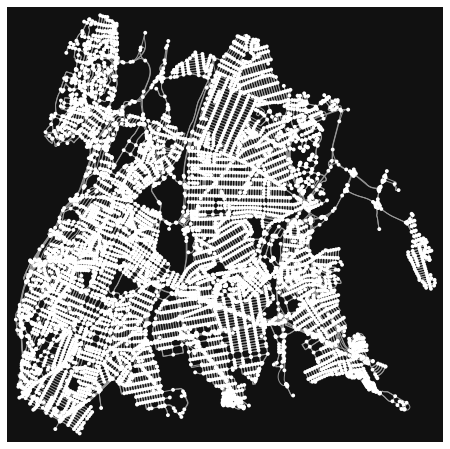

In [4]:
# download/model a street network for some city then visualize it
G = ox.graph_from_place("Bronx County, New York, US", network_type='drive')

# Plot the streets
fig, ax = ox.plot_graph(G);

### 2.Building footprint

#### <font color=#A52A2A >osmnx.geometries module
Download geospatial entities’ geometries and attributes from OpenStreetMap.<br>
Retrieve <font color=#A52A2A ><b>points of interest, building footprints, or any other objects</b></font> from OSM, including their geometries and attribute data, and construct a GeoDataFrame of them.

https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.geometries.geometries_from_place

#### <font color=#A52A2A >5 methods：
* osmnx.geometries.geometries_from_address(address, tags, dist=1000)
* osmnx.geometries.geometries_from_bbox(north, south, east, west, tags)
* osmnx.geometries.geometries_from_place(query, tags, which_result=None, buffer_dist=None)
* osmnx.geometries.geometries_from_point(center_point, tags, dist=1000)
* osmnx.geometries.geometries_from_polygon(polygon, tags)

#### <font color=#A52A2A >tags
* <b>tags = {"building": True}</b> would return all building footprints in the area<br>
* <b>tags = {"amenity":True, "landuse":["retail","commercial"], "highway":"bus_stop"}</b> would return all amenities, landuse=retail, landuse=commercial, and highway=bus_stop.

In [5]:
buildings_inside_area = ox.geometries_from_place("Bronx County, New York, US", tags={"building": True})
buildings_inside_area.to_csv('buildings.csv') 

In [ ]:
# print(buildings_inside_area["amenity"].unique())
# print(buildings_inside_area["building"].unique())
# print(buildings_inside_area["leisure"].unique())

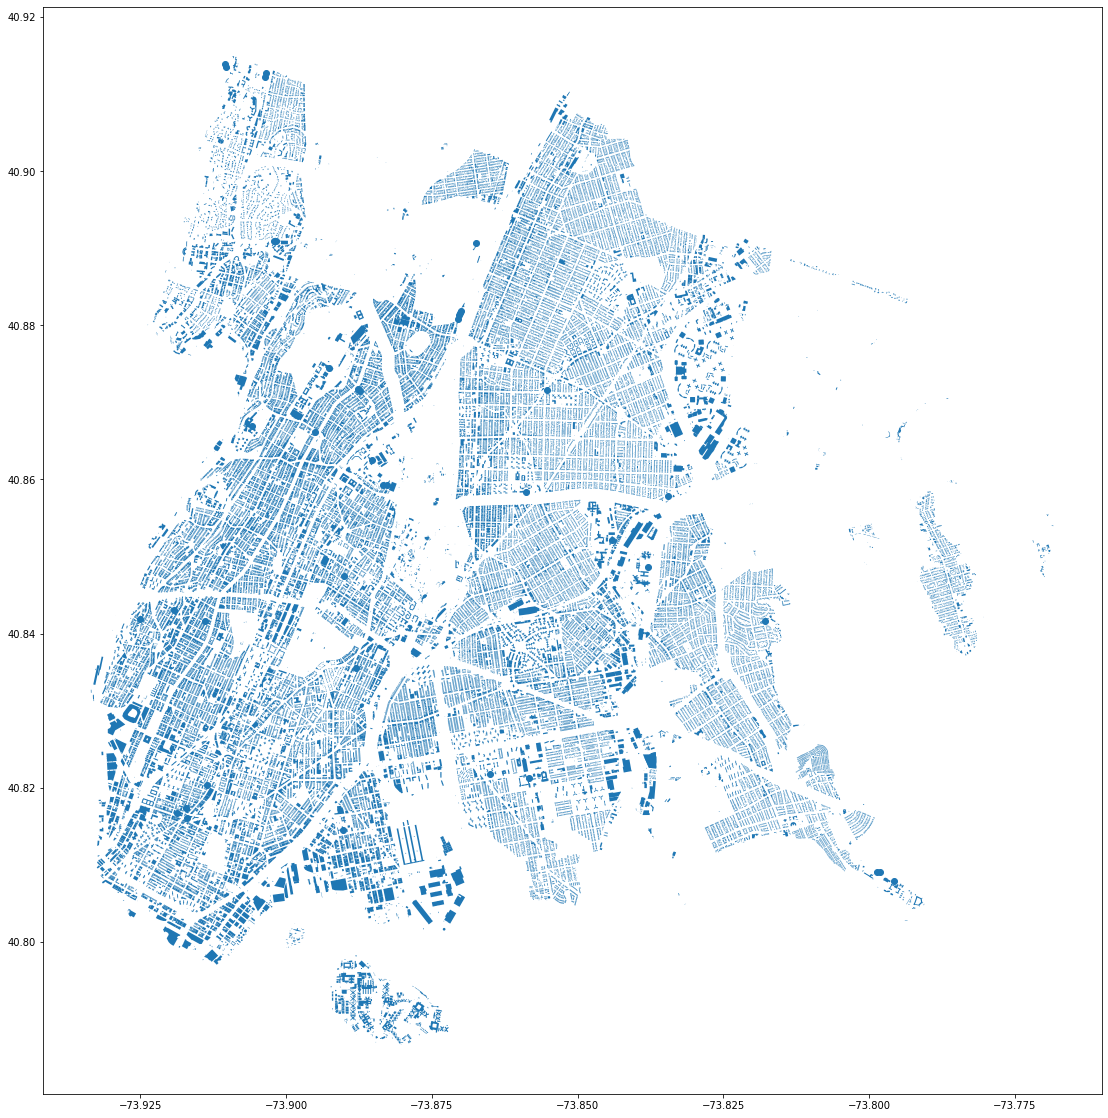

In [6]:
buildings_inside_area.plot(figsize=(20, 20))

### 3. Points of interest (POI)

#### Points-of-interest

#### OpenStreetMap POI features

https://wiki.openstreetmap.org/wiki/Map_features

<font color=#A52A2A ><b># Amenity </b></font> <br>
Used to map facilities used by visitors and residents. For example: toilets, telephones, banks, pharmacies, cafes, parking and schools. See the page Amenities for an introduction on its usage.

* Sustenance
* Education
* Transportation
* Financial
* Healthcare
* Entertainment, Arts & Culture
* Public Service
* Facilities
* Waste Management
* Others

192


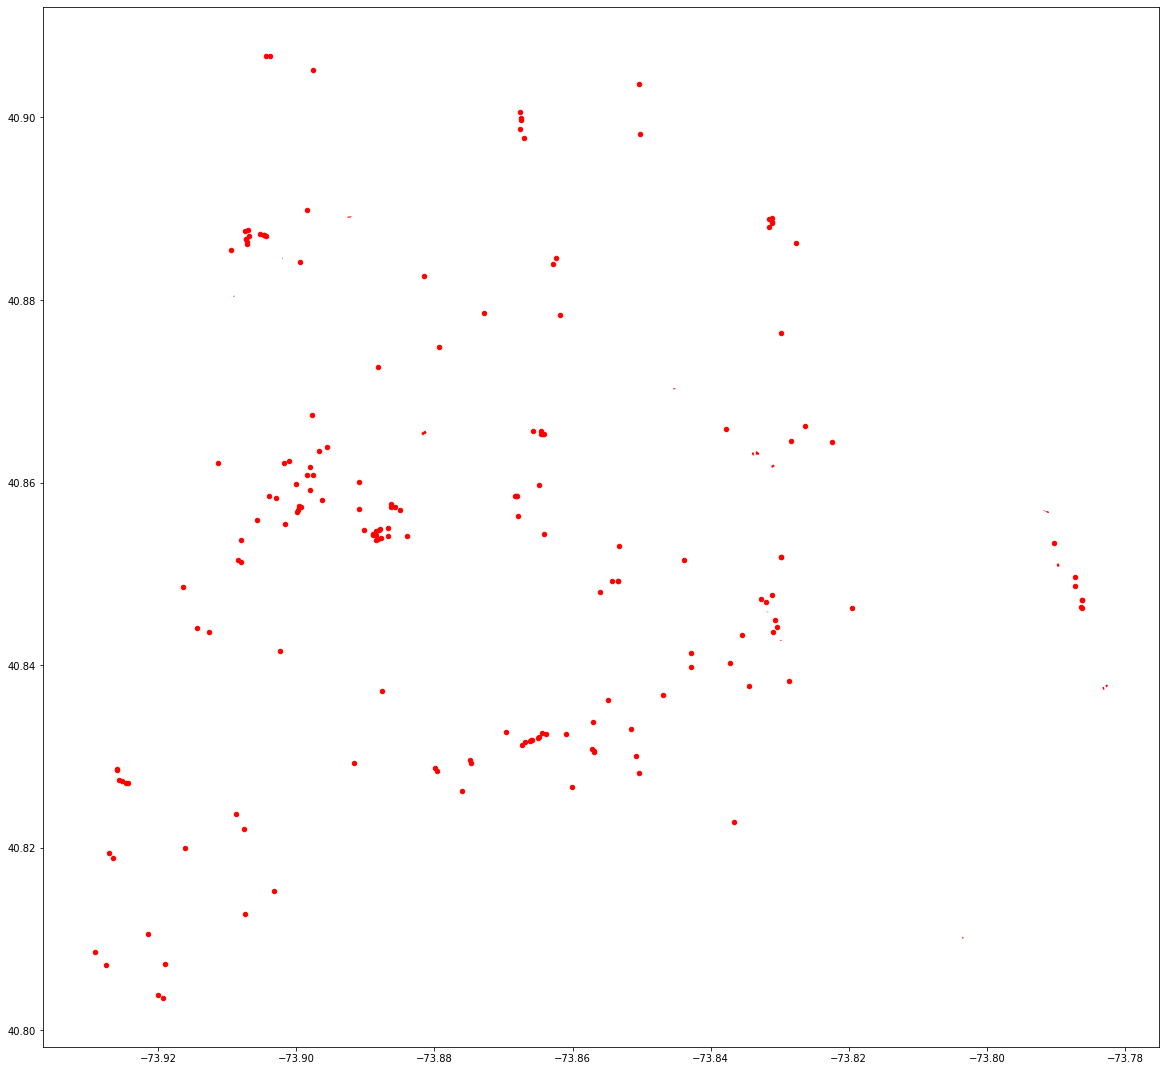

In [7]:
# get the restaurants POI in the Bronx
restaurants_POIs_around = ox.geometries_from_place("Bronx County, New York, US", tags={"amenity":"restaurant"})
print(len(restaurants_POIs_around))
restaurants_POIs_around.to_csv('restaurant.csv') 
restaurants_POIs_around.plot(figsize=(20, 20),color="red", markersize=20)

3581


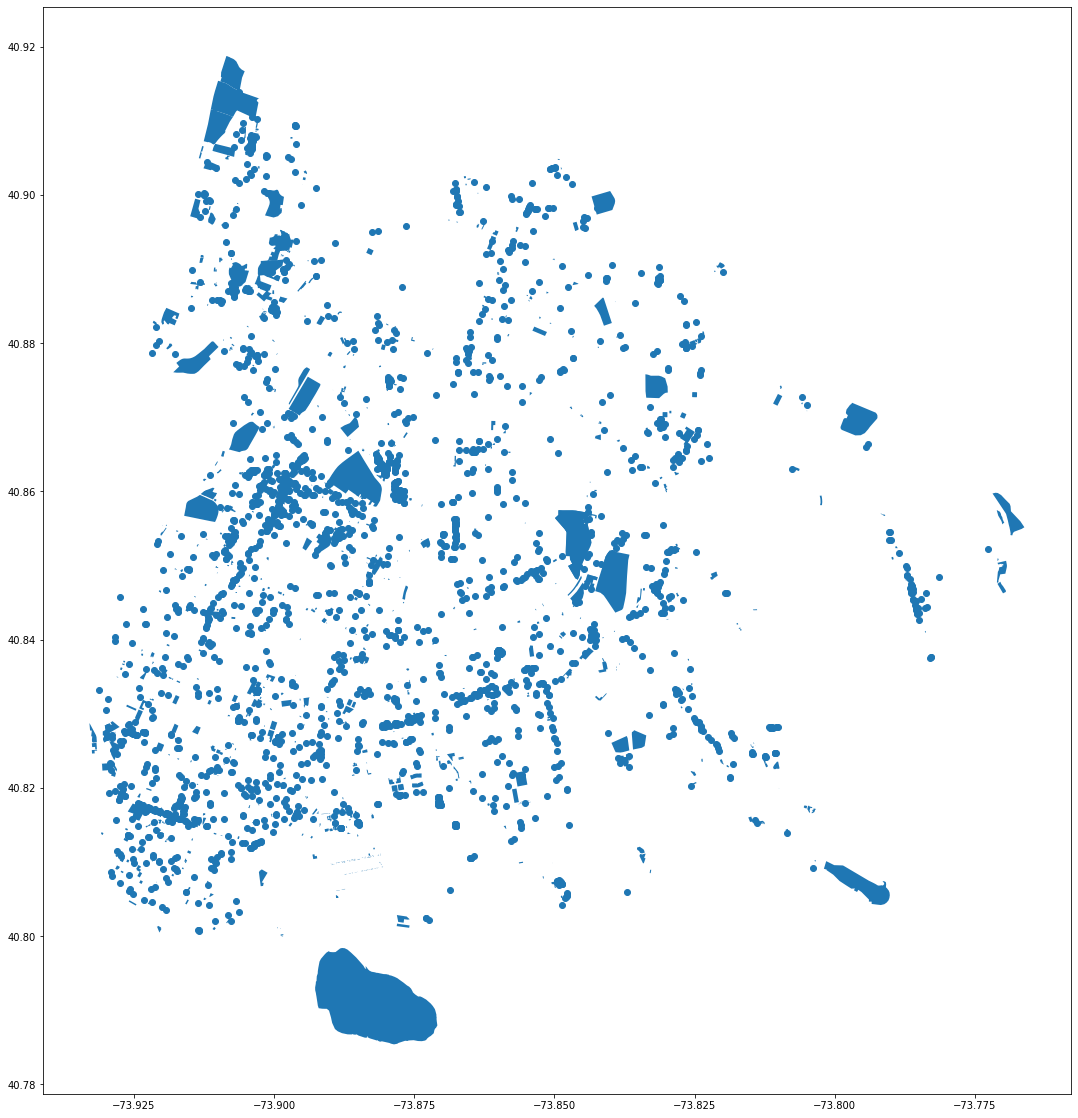

In [8]:
# get the amenities POI in the Bronx
POIs_around = ox.geometries_from_place("Bronx County, New York, US", tags={"amenity": True})
print(len(POIs_around))
POIs_around.to_csv('pois.csv') 
POIs_around.plot(figsize=(20, 20))

In [9]:
POIs_around

amenity ferry                          name  \
element_type osmid                                                           
node         42723103   ferry_terminal   yes    Hart Island Ferry Terminal   
             357544551          school   NaN            All Hallows School   
             357556824          school   NaN  Dodge Vocational High School   
             357557995          school   NaN       Intermediate School 131   
             357559473          school   NaN        Fieldston Upper School   
...                                ...   ...                           ...   
relation     6751430          fountain   NaN              Fountain of Life   
             13078672          parking   NaN                           NaN   
             14439819          college   NaN             Manhattan College   
             14606986          parking   NaN                           NaN   
             14767361          parking   NaN                           NaN   

                                             operator public_transport  \
element_type osmid                                                       
node         42723103   NYC Department of Corrections          station   
             357544551                            NaN              NaN   
             357556824                            NaN              NaN   
             357557995                            NaN              NaN   
             357559473                            NaN              NaN   
...                                               ...              ...   
relation     6751430                              NaN              NaN   
             13078672                             NaN              NaN   
             14439819                             NaN              NaN   
             14606986                             NaN              NaN   
             14767361                             NaN              NaN   

                                                                 geometry  \
element_type osmid                                                          
node         42723103                          POINT (-73.77268 40.85218)   
             357544551                         POINT (-73.92175 40.83045)   
             357556824                         POINT (-73.91153 40.81788)   
             357557995                         POINT (-73.86019 40.82351)   
             357559473                         POINT (-73.90698 40.88920)   
...                                                                   ...   
relation     6751430    POLYGON ((-73.87910 40.86646, -73.87909 40.866...   
             13078672   POLYGON ((-73.84913 40.85626, -73.84915 40.856...   
             14439819   MULTIPOLYGON (((-73.90051 40.88672, -73.90031 ...   
             14606986   POLYGON ((-73.79691 40.87194, -73.79271 40.870...   
             14767361   POLYGON ((-73.87738 40.85372, -73.87745 40.853...   

                        ele gnis:county_id gnis:created gnis:feature_id  ...  \
element_type osmid                                                       ...   
node         42723103   NaN            NaN          NaN             NaN  ...   
             357544551   20            005   01/23/1980          942326  ...   
             357556824    8            005   01/23/1980          948528  ...   
             357557995    4            005   01/23/1980          949441  ...   
             357559473   64            005   01/23/1980          950028  ...   
...                     ...            ...          ...             ...  ...   
relation     6751430    NaN            NaN          NaN             NaN  ...   
             13078672   NaN            NaN          NaN             NaN  ...   
             14439819   NaN            NaN          NaN             NaN  ...   
             14606986   NaN            NaN          NaN             NaN  ...   
             14767361   NaN            NaN          NaN             NaN  ...   

          

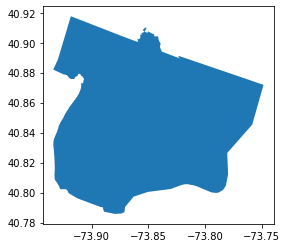

In [10]:
# draw the boundary of Bronx
area_name = "Bronx County, New York, US"
area = ox.geocode_to_gdf(area_name)
area.plot()

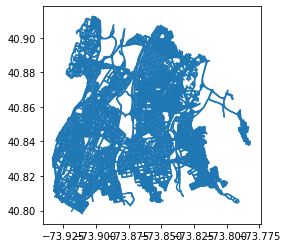

In [11]:
# Fetch OSM street network from the given location
roads = ox.graph_from_place(area_name, network_type="drive")
nodes, edges = ox.graph_to_gdfs(roads)
edges.plot()

In [12]:
nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
42453142,40.845204,-73.924239,3,NaN,NaN,POINT (-73.92424 40.84520)
42718381,40.866751,-73.888882,3,NaN,NaN,POINT (-73.88888 40.86675)
42718385,40.867957,-73.887690,3,NaN,NaN,POINT (-73.88769 40.86796)
42718392,40.825551,-73.854560,1,NaN,NaN,POINT (-73.85456 40.82555)
42718396,40.825773,-73.852761,4,NaN,NaN,POINT (-73.85276 40.82577)


In [13]:
edges.head()

osmid               name      highway  oneway  \
u        v        key                                                    
42718381 42736717 0    5696695  East 197th Street  residential   False   
         42736713 0    5696695  East 197th Street  residential   False   
42718385 42718381 0    5695529         Pond Place  residential    True   
         42776200 0    5699308  East 198th Street     tertiary   False   
         42755701 0    5699308  East 198th Street     tertiary   False   

                      reversed   length  \
u        v        key                     
42718381 42736717 0      False   64.772   
         42736713 0       True   90.010   
42718385 42718381 0      False  167.422   
         42776200 0      False  104.432   
         42755701 0       True   84.007   

                                                                geometry  \
u        v        key                                                      
42718381 42736717 0    LINESTRING (-73.88888 40.86675, -73.88869 40.8...   
         42736713 0    LINESTRING (-73.88888 40.86675, -73.88965 40.8...   
42718385 42718381 0    LINESTRING (-73.88769 40.86796, -73.88773 40.8...   
         42776200 0    LINESTRING (-73.88769 40.86796, -73.88756 40.8...   
         42755701 0    LINESTRING (-73.88769 40.86796, -73.88789 40.8...   

                      maxspeed lanes  ref bridge access tunnel width junction  
u        v        key                                                          
42718381 42736717 0        NaN   NaN  NaN    NaN    NaN    NaN   NaN      NaN  
         42736713 0        NaN   NaN  NaN    NaN    NaN    NaN   NaN      NaN  
42718385 42718381 0        NaN   NaN  NaN    NaN    NaN    NaN   NaN      NaN  
         42776200 0        NaN   NaN  NaN    NaN    NaN    NaN   NaN      NaN  
         42755701 0        NaN   NaN  NaN    NaN    NaN    NaN   NaN      NaN

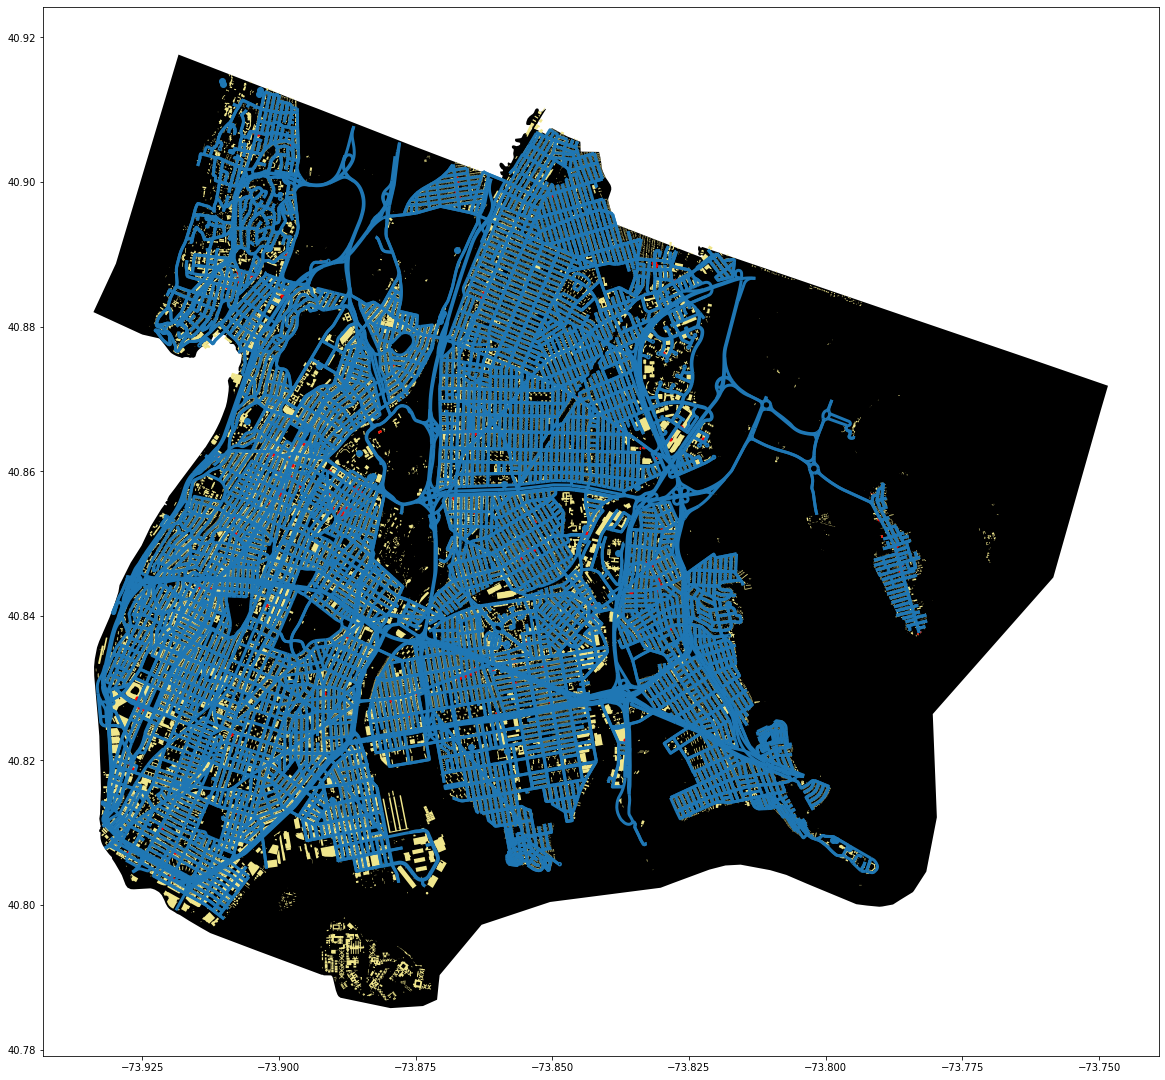

In [14]:
# 叠合所有的分层图像

fig, ax = plt.subplots(figsize=(20, 20))

#  Plot the footprint
area.plot(ax=ax, facecolor="black", zorder=0)

# Plot street edges
edges.plot(ax=ax, linewidth=3, zorder=5)

# Plot buildings
buildings_inside_area.plot(ax=ax, facecolor="khaki")

# Plot restaurants
restaurants_POIs_around.plot(ax=ax, color="red", markersize=10)

In [15]:
# landscape
leisure = ox.geometries_from_place(area_name, tags={"leisure":True})
leisure.head()

highway                    geometry layer barrier ele  \
element_type osmid                                                             
node         357563150     NaN  POINT (-73.83958 40.87343)   NaN     NaN  15   
             357599530     NaN  POINT (-73.82290 40.84911)   NaN     NaN   5   
             357607736     NaN  POINT (-73.90236 40.88927)   NaN     NaN  23   
             357607739     NaN  POINT (-73.90208 40.88954)   NaN     NaN  28   
             357609309     NaN  POINT (-73.90680 40.82510)   NaN     NaN  23   

                       gnis:county_id gnis:created gnis:feature_id  \
element_type osmid                                                   
node         357563150            005   01/23/1980          951981   
             357599530            005   01/23/1980          974835   
             357607736            005   01/01/2000         2042056   
             357607739            005   01/01/2000         2042057   
             357609309            005   01/01/2000         2062142   

                       gnis:state_id leisure  ... man_made service location  \
element_type osmid                            ...                             
node         357563150            36    park  ...      NaN     NaN      NaN   
             357599530            36    park  ...      NaN     NaN      NaN   
             357607736            36    park  ...      NaN     NaN      NaN   
             357607739            36    park  ...      NaN     NaN      NaN   
             357609309            36    park  ...      NaN     NaN      NaN   

                       swimming_pool length ways type opening_hours:covid19  \
element_type osmid                                                            
node         357563150           NaN    NaN  NaN  NaN                   NaN   
             357599530           NaN    NaN  NaN  NaN                   NaN   
             357607736           NaN    NaN  NaN  NaN                   NaN   
             357607739           NaN    NaN  NaN  NaN                   NaN   
             357609309           NaN    NaN  NaN  NaN                   NaN   

                       lanes:sprint width  
element_type osmid                         
node         357563150          NaN   NaN  
             357599530          NaN   NaN  
             357607736          NaN   NaN  
             357607739          NaN   NaN  
             357609309          NaN   NaN  

[5 rows x 127 columns]

In [16]:
# Check all values for the column "leisure"
leisure["leisure"].value_counts()

swimming_pool        3122
pitch                 641
park                  353
garden                200
playground            147
track                  58
picnic_table           51
fitness_centre         15
sports_centre          14
slipway                13
bleachers              13
schoolyard             12
stadium                10
golf_course             9
marina                  8
dog_park                6
fitness_station         4
outdoor_seating         2
sports_hall             2
sport                   2
dance                   2
nature_reserve          1
bowling                 1
recreation_ground       1
common                  1
amusement_arcade        1
shooting_ground         1
miniature_golf          1
horse_riding            1
tanning_salon           1
bowling_alley           1
Name: leisure, dtype: int64

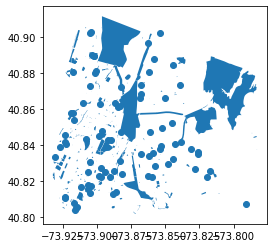

In [17]:
parks = leisure[leisure["leisure"].isin(["park", "sports_centre", "sport", "stadium"])]
parks.plot()

In [ ]:
# overlap all the layers

fig, ax = plt.subplots(figsize=(20, 20), dpi=300)
#  turn off the axis
ax.axis("off")

#  Plot the footprint
area.plot(ax=ax, facecolor="black", zorder=0)

# Plot street edges
edges.plot(ax=ax, linewidth=1, zorder=5)

# Plot buildings
buildings_inside_area.plot(ax=ax, facecolor="khaki", zorder = 3)

# Plot POIs
POIs_around.plot(ax=ax, color="red", markersize=10, zorder = 4)

# Plot parks
parks.plot(ax=ax,color="green", alpha=0.5, zorder = 1)

plt.savefig("output_files.png")

In [ ]:
# 讲上述内容简写为一个方便调用的函数

def make_figure_ground(place_name):
    filepath = "output_files/{}_figure_grounds.png".format(place_name)
    # 边界轮廓
    bounding_geometry = ox.geocode_to_gdf(place_name)
    # 绿地轮廓
    leisure = ox.geometries_from_place(place_name, tags={"leisure":["park", "sports_centre", "sport", "stadium"]})
    # 道路轮廓
    school_graph = ox.graph_from_place(place_name, network_type="drive")
    nodes, edges = ox.graph_to_gdfs(school_graph)
    # 建筑轮廓
    buildings_inside_area = ox.geometries_from_place(place_name, tags={"building": True})

    # 叠合所有的分层图像
    fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
    #  关掉坐标轴与刻度
    ax.axis("off")
    
    #  Plot the footprint
    bounding_geometry.plot(ax=ax, facecolor="black", zorder=0)
    # Plot street edges
    edges.plot(ax=ax, linewidth=3, zorder=5)  
    # Plot buildings
    buildings_inside_area.plot(ax=ax, facecolor="khaki", zorder = 3)
    # Plot parks
    leisure.plot(ax=ax,color="green", alpha=0.5, zorder = 1)
    
    plt.savefig(filepath) 

In [ ]:
# make_figure_ground("哈尔滨工业大学, 哈尔滨, 中国")
make_figure_ground("Bronx County, New York, US")